# B: Estimando um Intervalo de Confiança para a Média

Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:

Calcular a média e o desvio padrão da amostra.

Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.
Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.

In [55]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [56]:
# Gerar dados amostrais (Peso de 30 pessoas)
np.random.seed(42)
pesos = np.random.normal(loc=70, scale=8, size=30)

In [57]:
# Calcular média e desvio padrão da amostra
media = np.mean(pesos)
desvio_padrao = np.std(pesos, ddof=1)

print(f"Média da amostra: {media:.2f} kg")
print(f"Desvio padrão da amostra: {desvio_padrao:.2f} kg")

Média da amostra: 68.49 kg
Desvio padrão da amostra: 7.20 kg


# Calcular o intervalo de confiança 95%

In [58]:
erro_padrao = stats.sem(pesos) 
intervalo = stats.t.interval(0.95, df=len(pesos)-1, loc=media, scale=erro_padrao)

print(f"Intervalo de confiança 95%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

Intervalo de confiança 95%: (65.81, 71.18)


95% de confiança, se pode afirmar que a média da população está entre 65.81 e 71.18 kg

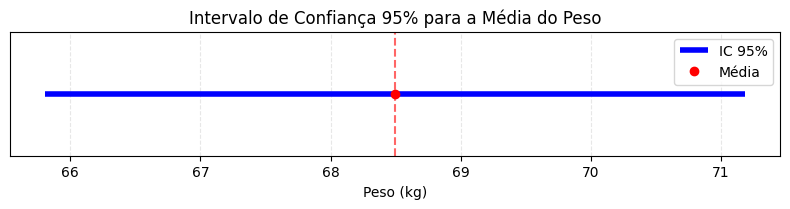

In [46]:
# Plotar intervalo de confiança 95%
plt.figure(figsize=(8, 2.2))
plt.hlines(1, intervalo[0], intervalo[1], colors='blue', linewidth=4, label='IC 95%')
plt.plot(media, 1, 'o', color='red', label='Média')
plt.axvline(media, color='red', linestyle='--', alpha=0.6)
plt.title('Intervalo de Confiança 95% para a Média do Peso')
plt.xlabel('Peso (kg)')
plt.yticks([])
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular o intervalo de confiança 90%

In [ ]:
erro_padrao = stats.sem(pesos)  
intervalo = stats.t.interval(0.90, df=len(pesos)-1, loc=media, scale=erro_padrao)

print(f"Intervalo de confiança 90%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

Intervalo de confiança 90%: (66.26, 70.73)


90% de confiança, se pode afirmar que a média da população está entre 66.26 e 70.73 kg

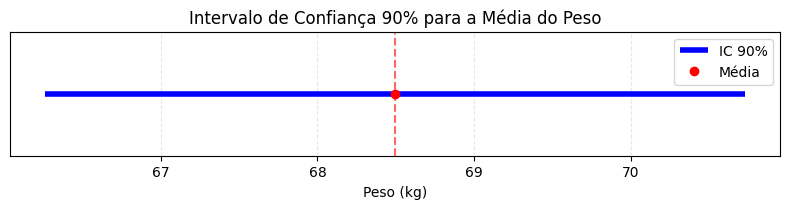

In [48]:
# Plotar intervalo de confiança 90%
plt.figure(figsize=(8, 2.2))
plt.hlines(1, intervalo[0], intervalo[1], colors='blue', linewidth=4, label='IC 90%')
plt.plot(media, 1, 'o', color='red', label='Média')
plt.axvline(media, color='red', linestyle='--', alpha=0.6)
plt.title('Intervalo de Confiança 90% para a Média do Peso')
plt.xlabel('Peso (kg)')
plt.yticks([])
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Calcular o intervalo de confiança 99%

In [49]:
erro_padrao = stats.sem(pesos)  # mesma coisa que desvio_padrao / sqrt(n)
intervalo = stats.t.interval(0.99, df=len(pesos)-1, loc=media, scale=erro_padrao)

print(f"Intervalo de confiança 95%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

Intervalo de confiança 95%: (64.87, 72.12)


99% de confiança, se pode afirmar que a média da população está entre 64.87 e 72.12 kg

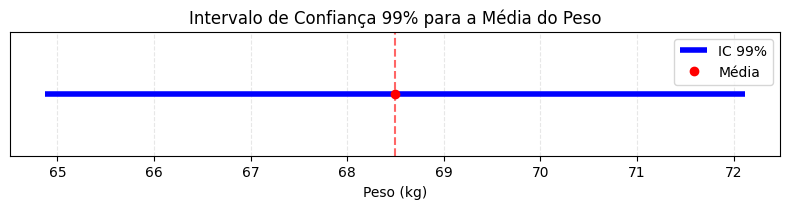

In [50]:
# Plotar intervalo de confiança 99%
plt.figure(figsize=(8, 2.2))
plt.hlines(1, intervalo[0], intervalo[1], colors='blue', linewidth=4, label='IC 99%')
plt.plot(media, 1, 'o', color='red', label='Média')
plt.axvline(media, color='red', linestyle='--', alpha=0.6)
plt.title('Intervalo de Confiança 99% para a Média do Peso')
plt.xlabel('Peso (kg)')
plt.yticks([])
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar os 3 Intervalos de Confiança

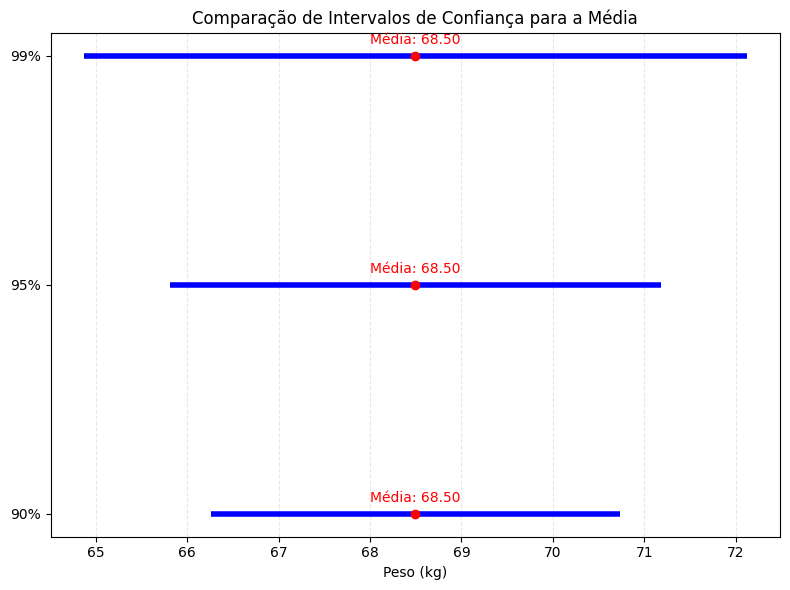

In [51]:
niveis = ['90%', '95%', '99%']
intervalos = [(66.26, 70.73), (65.81, 71.18), (64.87, 72.12)]
medias = [(i[0] + i[1]) / 2 for i in intervalos]

# Plot
plt.figure(figsize=(8, 6))
for i, (nivel, ic, media) in enumerate(zip(niveis, intervalos, medias)):
    plt.hlines(y=i, xmin=ic[0], xmax=ic[1], colors='blue', linewidth=4 )
    plt.plot(media, i, 'ro')  # ponto da média
    plt.text(media, i + 0.05, f"Média: {media:.2f}", ha='center', color='red')

plt.yticks(ticks=range(len(niveis)), labels=niveis)
plt.xlabel("Peso (kg)")
plt.title("Comparação de Intervalos de Confiança para a Média")
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
